In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test  :", x_test.shape)
print("Shape of y_test  :", y_test.shape)

Shape of x_train : (60000, 28, 28)
Shape of y_train : (60000,)
Shape of x_test  : (10000, 28, 28)
Shape of y_test  : (10000,)


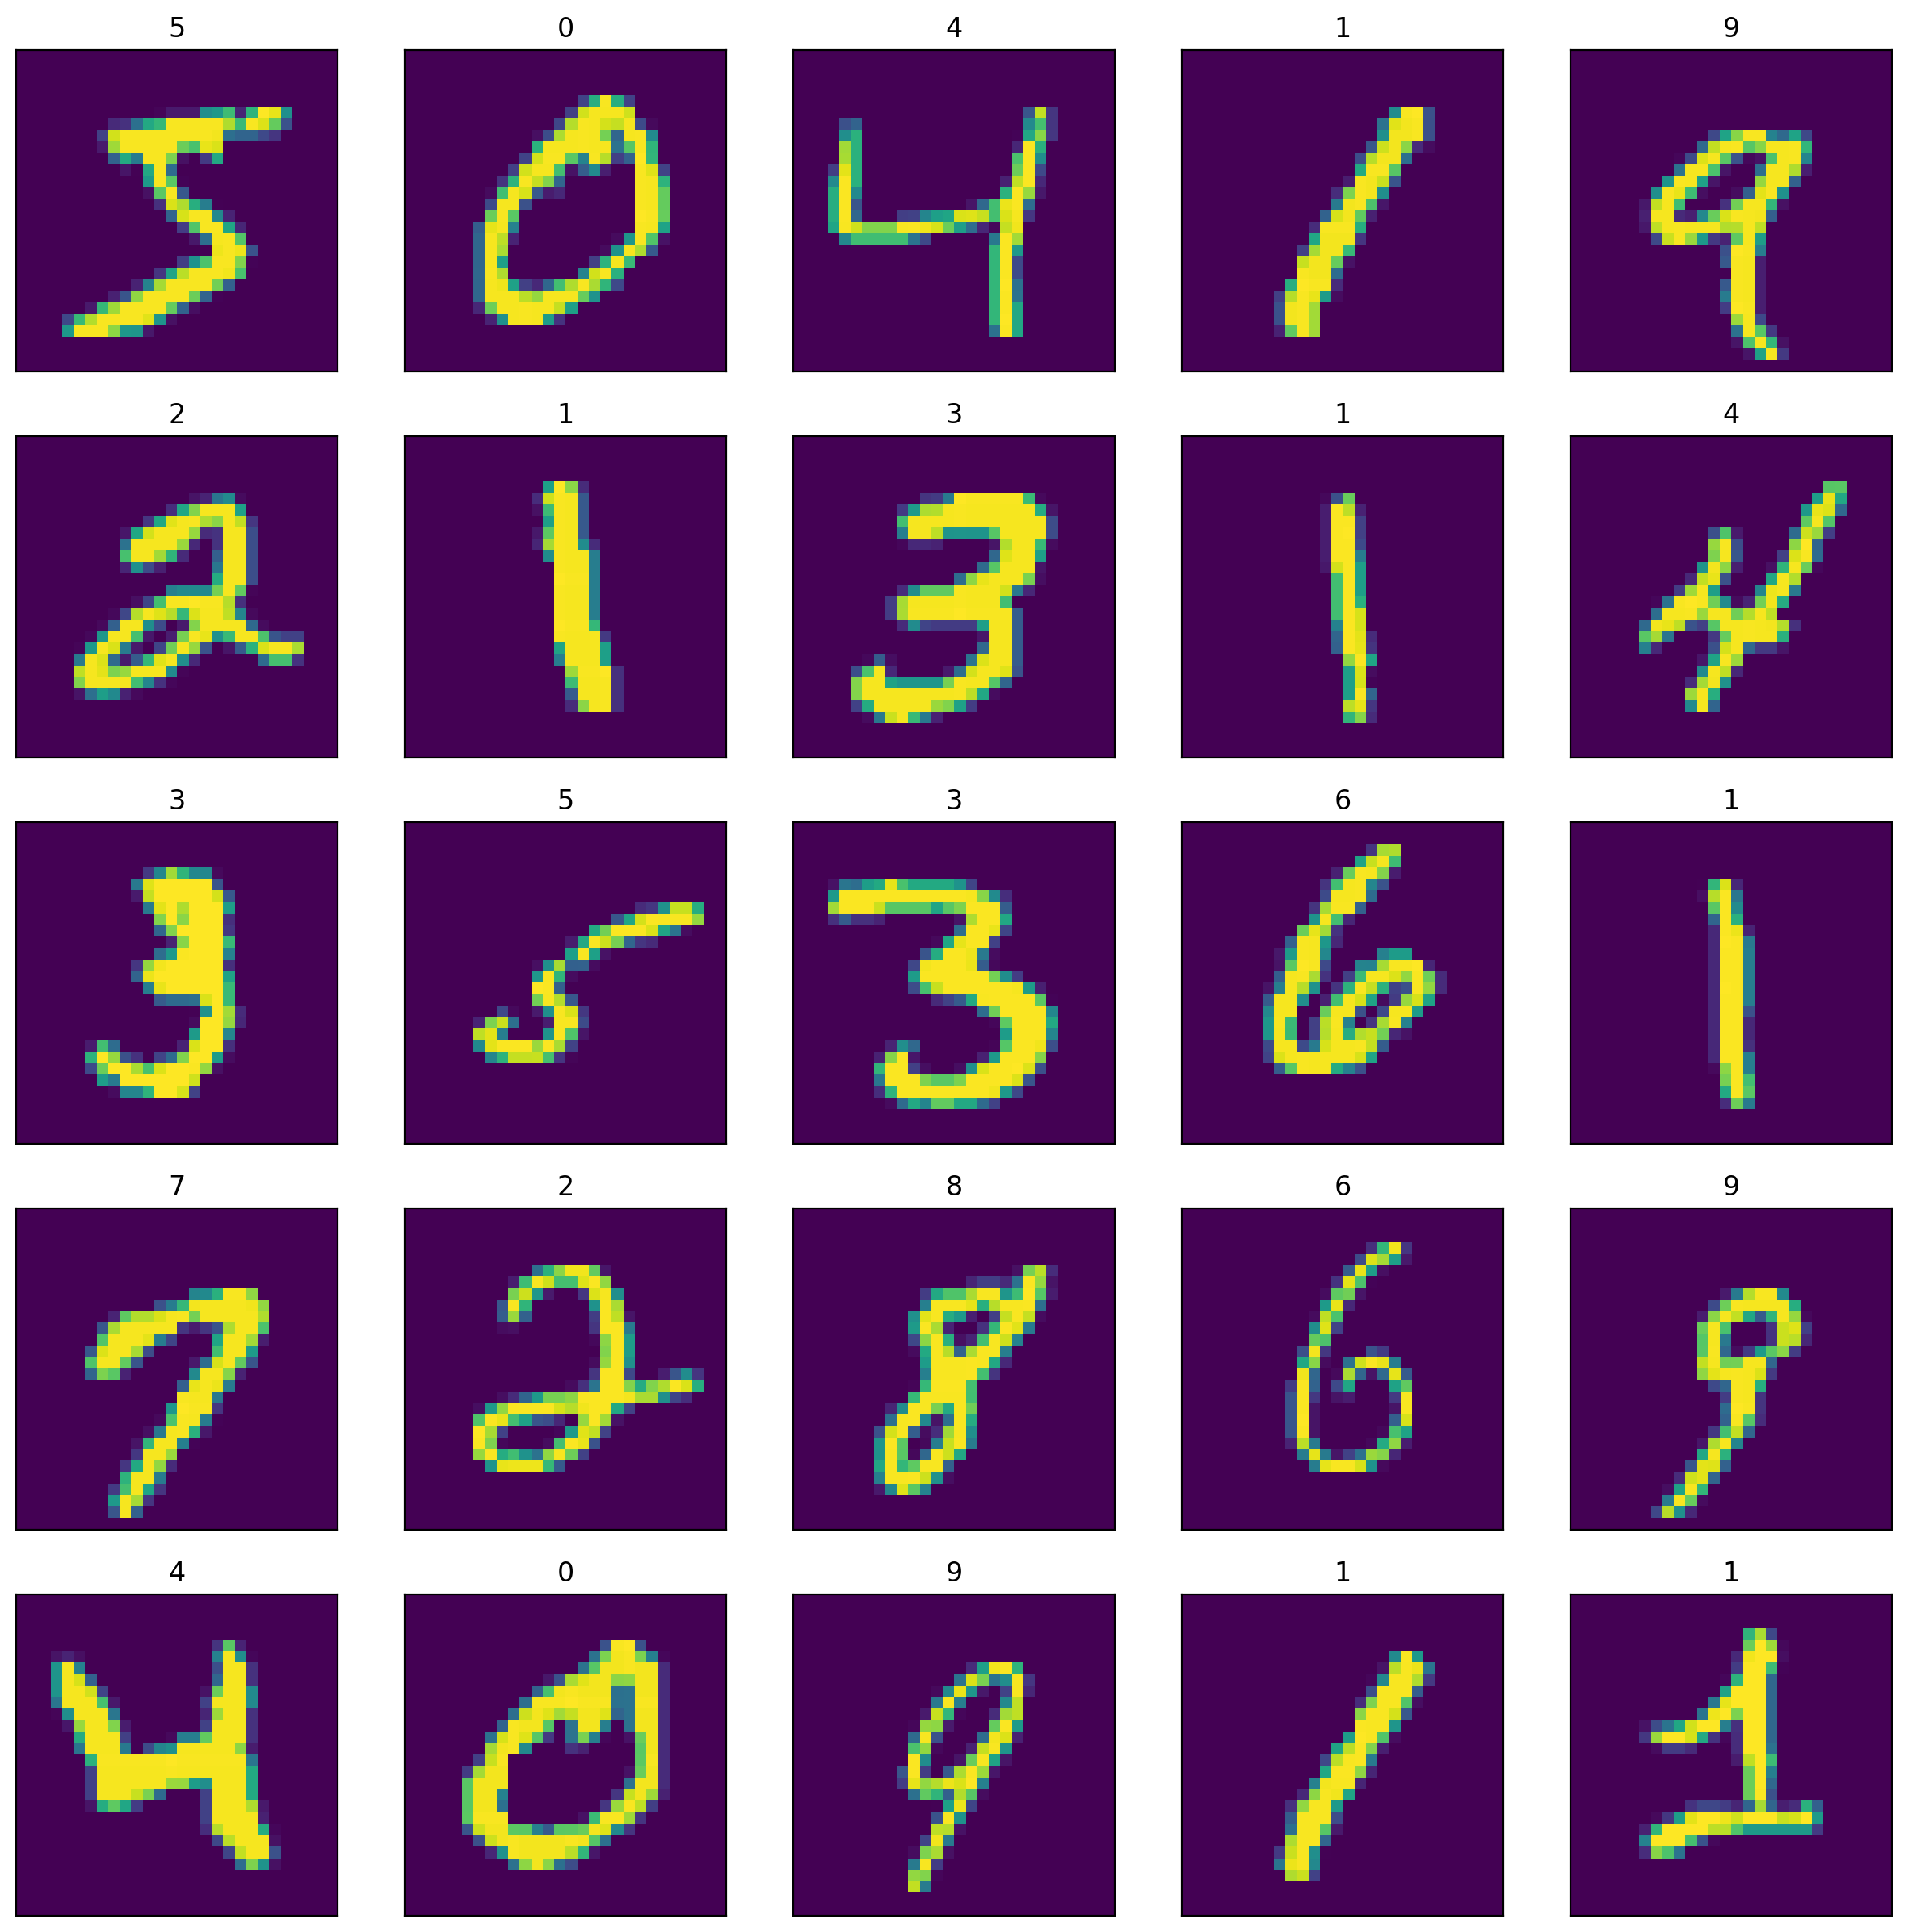

In [21]:
#printing first 25 images
h_w = np.unique(y_train)
plt.figure(figsize = (15, 15), dpi = 200)
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.title(h_w[y_train[i]], fontsize = 12)
plt.show()


In [22]:
#Creating a model
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(1500, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.8808 - loss: 8.8863
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.9407 - loss: 0.4510
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9432 - loss: 0.3913
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9507 - loss: 0.3124
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9555 - loss: 0.2767
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9598 - loss: 0.2316
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 24ms/step - accuracy: 0.9596 - loss: 0.2339
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 22ms/step - accuracy: 0.9615 - loss: 0.2296
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9630 - loss: 0.2269
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9643 - loss: 0.2263


In [23]:
model.evaluate(x_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9653 - loss: 0.2116


[0.21617381274700165, 0.9642999768257141]

In [24]:
y_predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [25]:
y_pred_list = [np.argmax(i) for i in y_predict]

In [32]:
#Creating a confusion matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_list)


Text(0.5, 1.0, 'Heatmap')

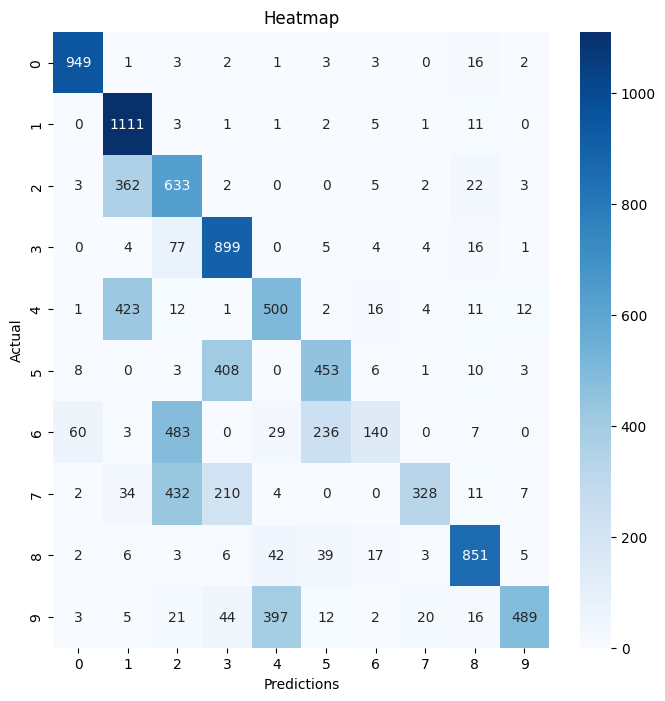

In [33]:
plt.figure(figsize = (8, 8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Heatmap')